In [1]:
# Loading required libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
# load image from images directory
images = [
    "../img/kucing.jpg",
    "../img/gradient.png",
    "../img/Penguins.jpg",
    "../img/arizona.jpg",
    "../img/Tulips.jpg",
    "../img/Koala.jpg",
]

# Set up the subplot grid
rows = len(images)
cols = 4

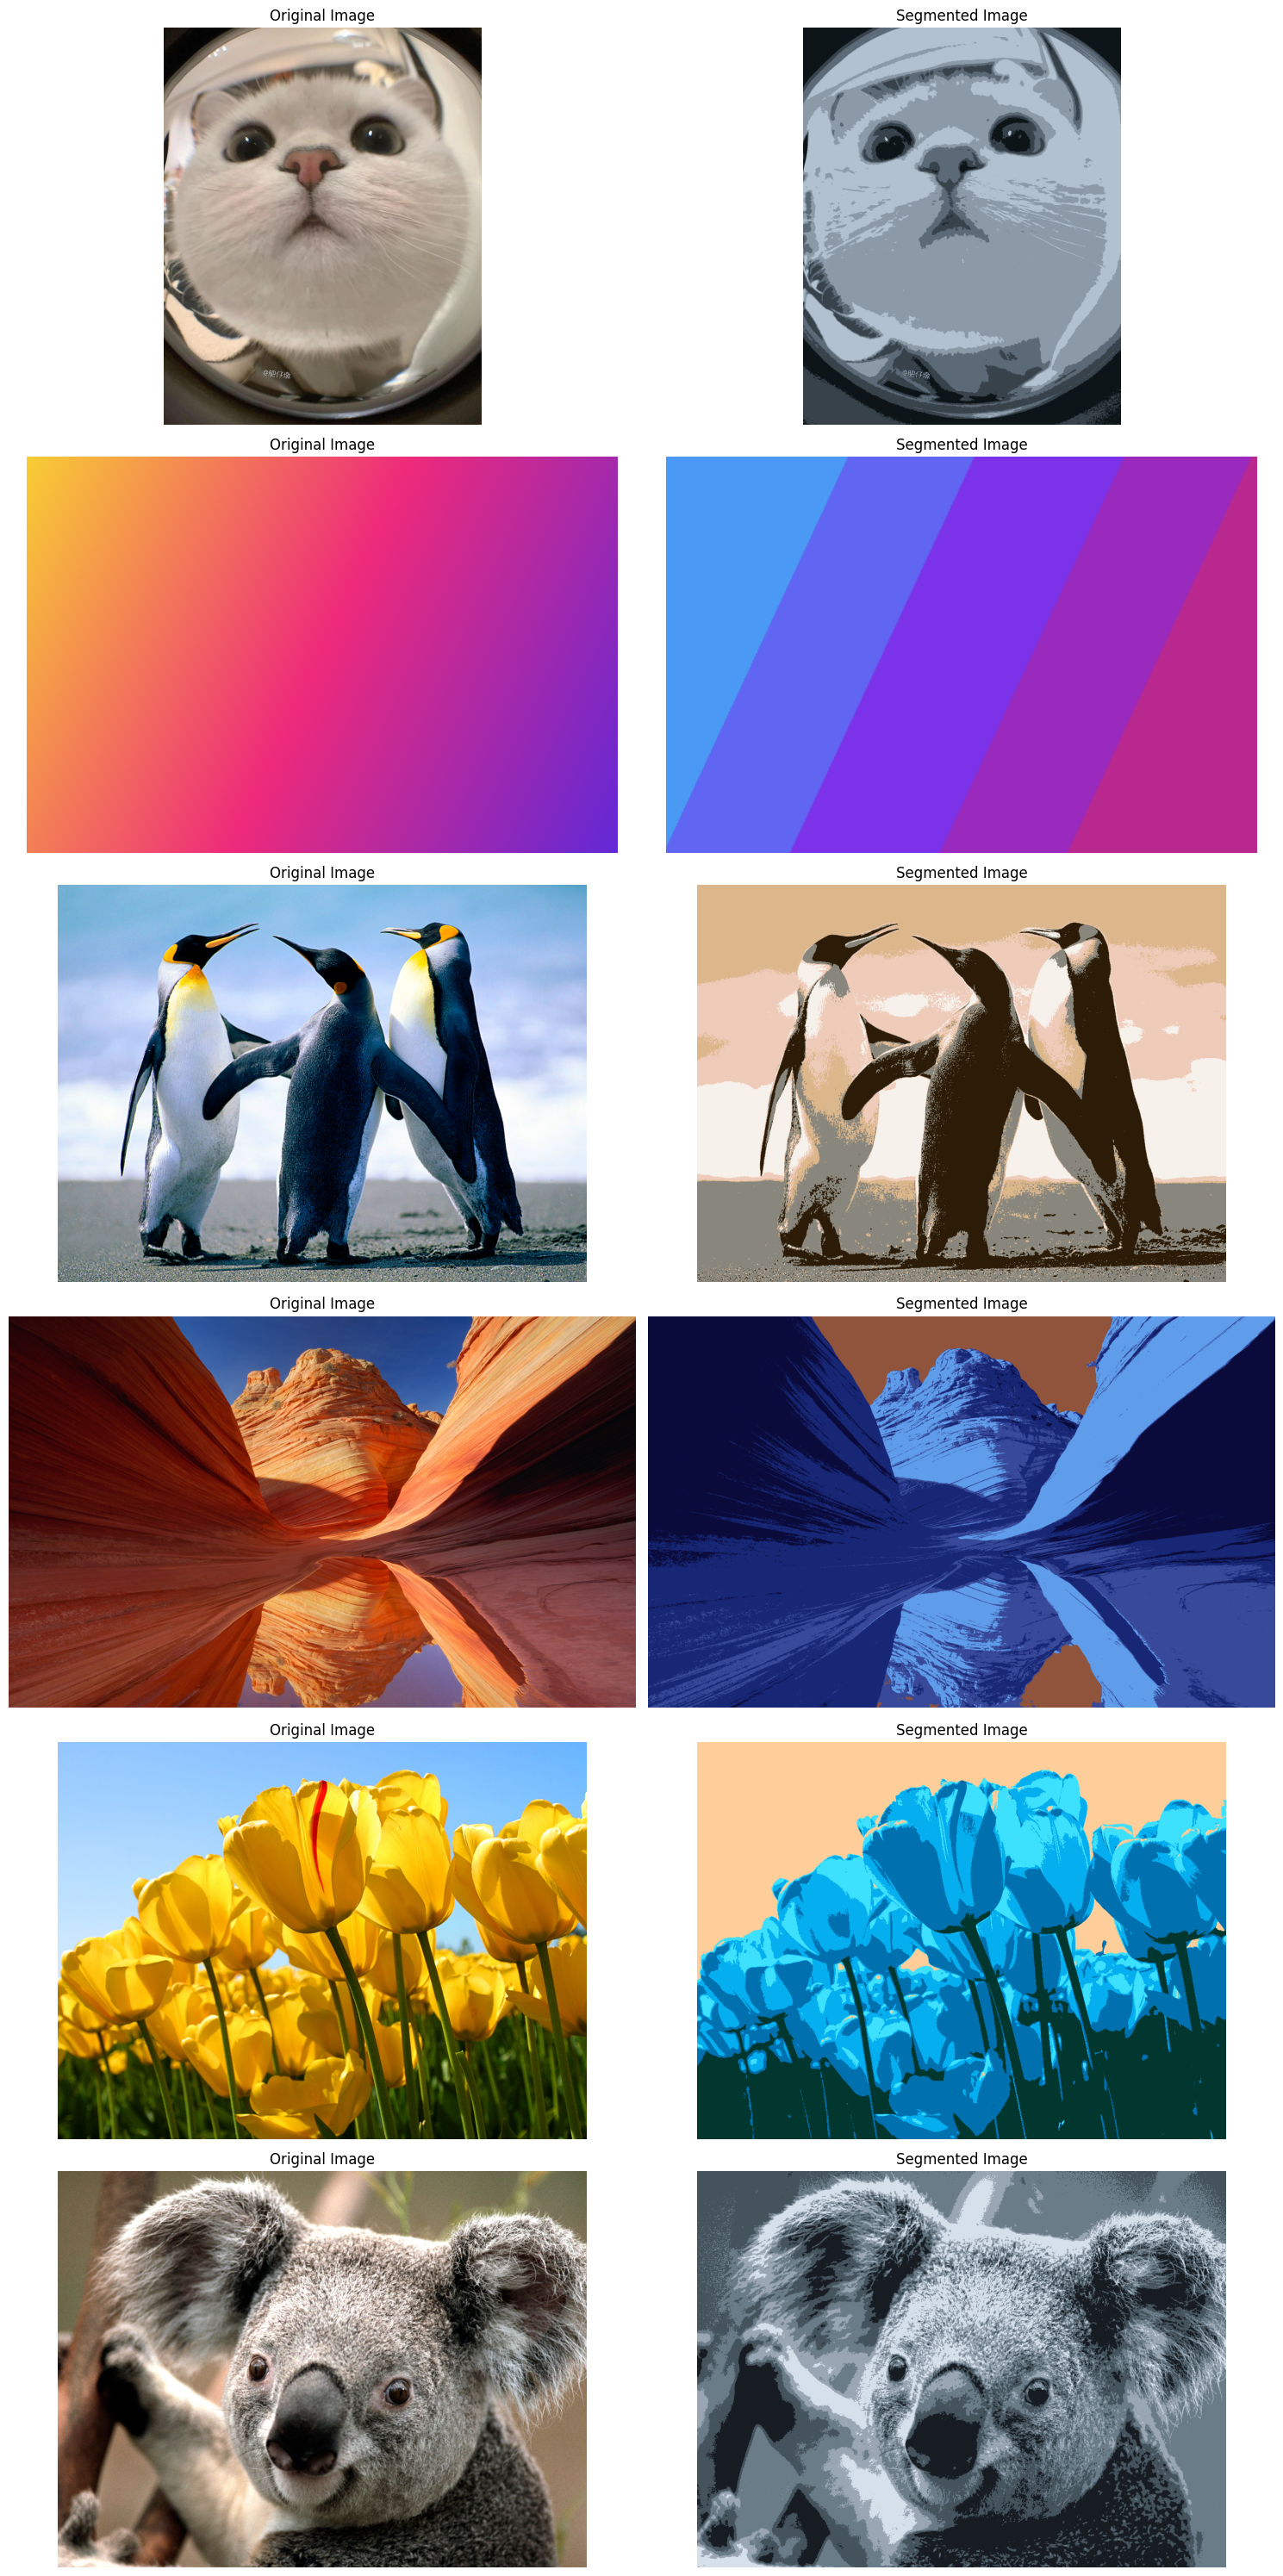

In [3]:
# Create a subplot for each image
fig, axes = plt.subplots(rows, 2, figsize=(15, 5 * rows))

# Loop through each image
for i, imgFilename in enumerate(images):
    # Membaca data Image
    oriImg = cv2.imread(imgFilename)

    # Display the original image
    axes[i, 0].imshow(cv2.cvtColor(oriImg, cv2.COLOR_BGR2RGB))
    axes[i, 0].set_title("Original Image")
    axes[i, 0].axis("off")

    # Membaca data Image
    img = cv2.imread(imgFilename)

    # Reshaping the image into a 2D array of pixels and 3 color values (RGB)
    pixel_vals = img.reshape((-1, 3))  # numpy reshape operation -1 unspecified

    # Convert to float type only for supporting cv2.kmean
    pixel_vals = np.float32(pixel_vals)

    # criteria
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)

    # Choosing number of cluster
    k = 5

    retval, labels, centers = cv2.kmeans(
        pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS
    )

    # convert data into 8-bit values
    centers = np.uint8(centers)

    segmented_data = centers[
        labels.flatten()
    ]  # Mapping labels to center points( RGB Value)

    # reshape data into the original image dimensions
    segmented_image = segmented_data.reshape((img.shape))

    titles = [
        "Segmented Image",
    ]

    segmented_image = [segmented_image]

    for j in range(len(titles)):
        # Display the image
        axes[i, j + 1].imshow(segmented_image[j])
        axes[i, j + 1].set_title(f"{titles[j]}")
        axes[i, j + 1].axis("off")

# Show the plot
plt.tight_layout()
plt.show()